<a href="https://colab.research.google.com/github/Aagam1005/Machine-Learning/blob/main/House_Price_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House Price Prediction using Linear Regression
Loading dataset...
Dataset loaded successfully!
Dataset shape: (1460, 8)
Columns: ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'YearBuilt', 'OverallQual', 'GarageCars', 'SalePrice']

Dataset Overview:
     GrLivArea  BedroomAbvGr  FullBath  HalfBath  YearBuilt  OverallQual  \
0  1748.357077             2         2         2       1908            4   
1  1430.867849             3         3         1       2006            1   
2  1823.844269             3         1         2       1879            7   
3  2261.514928             3         2         0       1949           10   
4  1382.923313             2         4         2       1939            6   

   GarageCars      SalePrice  
0           6  323079.852100  
1           2  253916.386253  
2           3  305040.590352  
3           0  316003.646086  
4           0  250396.715950  

Statistical Summary:
         GrLivArea  BedroomAbvGr     FullBath     HalfBath    YearBuilt  \
cou

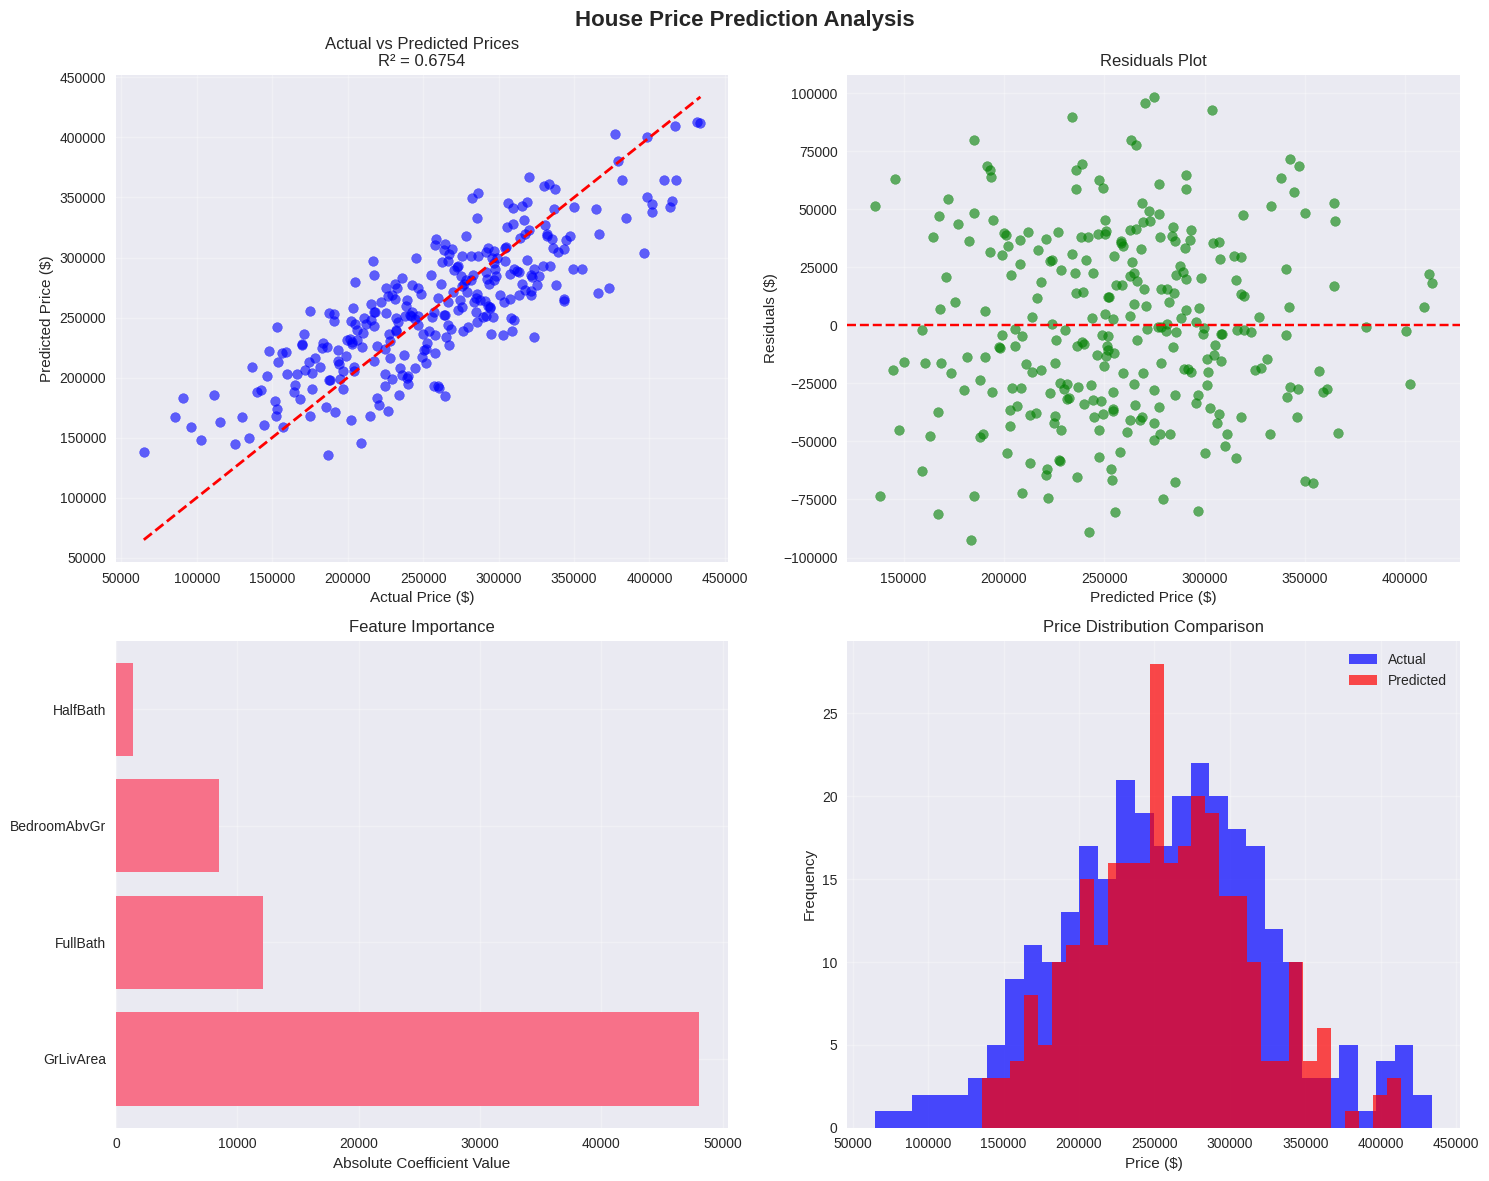


Feature Correlation Matrix:


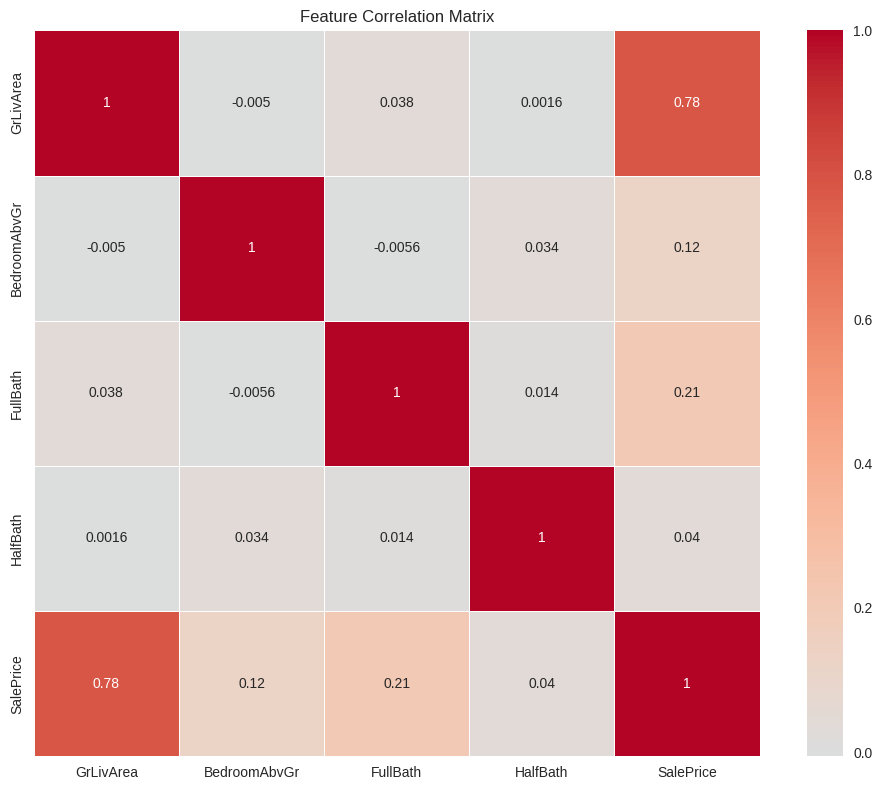


Example Predictions:
House 1:
  Square Footage: 1,200 sq ft
  Bedrooms: 2
  Full Bathrooms: 1
  Half Bathrooms: 1
  Predicted Price: $216,064.26

House 2:
  Square Footage: 1,800 sq ft
  Bedrooms: 3
  Full Bathrooms: 2
  Half Bathrooms: 1
  Predicted Price: $291,075.21

House 3:
  Square Footage: 2,500 sq ft
  Bedrooms: 4
  Full Bathrooms: 2
  Half Bathrooms: 1
  Predicted Price: $367,576.75

House 4:
  Square Footage: 3,000 sq ft
  Bedrooms: 5
  Full Bathrooms: 3
  Half Bathrooms: 2
  Predicted Price: $433,838.16

Analysis Complete!

Key Insights:
- The model explains 67.5% of the variance in house prices
- Average prediction error: $32,709.56
- Most important feature: GrLivArea

Instructions for Google Colab:
1. Upload this script to Google Colab
2. To use real Kaggle data:
   - Install kaggle: !pip install kaggle
   - Upload your kaggle.json API key
   - Download data: !kaggle competitions download -c house-prices-advanced-regression-techniques
   - Replace the synthetic data secti

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("House Price Prediction using Linear Regression")
print("=" * 50)

print("Loading dataset...")

# Creating sample data that mimics the Kaggle house prices dataset structure
np.random.seed(42)
n_samples = 1460

data = {
    'GrLivArea': np.random.normal(1500, 500, n_samples),
    'BedroomAbvGr': np.random.poisson(3, n_samples),
    'FullBath': np.random.poisson(2, n_samples),
    'HalfBath': np.random.poisson(1, n_samples),
    'YearBuilt': np.random.randint(1872, 2010, n_samples),
    'OverallQual': np.random.randint(1, 11, n_samples),
    'GarageCars': np.random.poisson(2, n_samples),
}

base_price = (
    data['GrLivArea'] * 100 +
    data['BedroomAbvGr'] * 5000 +
    data['FullBath'] * 8000 +
    data['HalfBath'] * 3000 +
    (data['YearBuilt'] - 1900) * 200 +
    data['OverallQual'] * 10000 +
    data['GarageCars'] * 7000
)

noise = np.random.normal(0, 20000, n_samples)
data['SalePrice'] = np.maximum(base_price + noise, 50000)

df = pd.DataFrame(data)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

print("\nDataset Overview:")
print(df.head())

print("\nStatistical Summary:")
print(df.describe())

print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

print(f"\nSelected Features: {features}")
print(f"Target Variable: {target}")

X = df[features].copy()
y = df[target].copy()

print("\nData Preprocessing...")

Q1 = X['GrLivArea'].quantile(0.25)
Q3 = X['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (X['GrLivArea'] >= lower_bound) & (X['GrLivArea'] <= upper_bound)
X = X[mask]
y = y[mask]

print(f"Removed {len(df) - len(X)} outliers")
print(f"Final dataset shape: {X.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Data split completed:")
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Testing set: {X_test.shape[0]} samples")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nTraining Linear Regression Model...")
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nModel Performance Metrics:")
print("=" * 40)
print("Training Set:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: ${np.sqrt(train_mse):,.2f}")
print(f"  MAE: ${train_mae:,.2f}")
print("\nTesting Set:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: ${np.sqrt(test_mse):,.2f}")
print(f"  MAE: ${test_mae:,.2f}")

print("\nFeature Importance (Coefficients):")
print("=" * 40)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

for _, row in feature_importance.iterrows():
    print(f"  {row['Feature']}: {row['Coefficient']:,.2f}")

print(f"\nIntercept: ${model.intercept_:,.2f}")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('House Price Prediction Analysis', fontsize=16, fontweight='bold')

axes[0, 0].scatter(y_test, y_test_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price ($)')
axes[0, 0].set_ylabel('Predicted Price ($)')
axes[0, 0].set_title(f'Actual vs Predicted Prices\nR² = {test_r2:.4f}')
axes[0, 0].grid(True, alpha=0.3)

residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Predicted Price ($)')
axes[0, 1].set_ylabel('Residuals ($)')
axes[0, 1].set_title('Residuals Plot')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
axes[1, 0].set_xlabel('Absolute Coefficient Value')
axes[1, 0].set_title('Feature Importance')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(y_test, bins=30, alpha=0.7, label='Actual', color='blue')
axes[1, 1].hist(y_test_pred, bins=30, alpha=0.7, label='Predicted', color='red')
axes[1, 1].set_xlabel('Price ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Price Distribution Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nFeature Correlation Matrix:")
correlation_matrix = df[features + [target]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

print("\nExample Predictions:")
print("=" * 40)

example_houses = pd.DataFrame({
    'GrLivArea': [1200, 1800, 2500, 3000],
    'BedroomAbvGr': [2, 3, 4, 5],
    'FullBath': [1, 2, 2, 3],
    'HalfBath': [1, 1, 1, 2]
})

example_scaled = scaler.transform(example_houses)
example_predictions = model.predict(example_scaled)

for i, (_, house) in enumerate(example_houses.iterrows()):
    print(f"House {i+1}:")
    print(f"  Square Footage: {house['GrLivArea']:,} sq ft")
    print(f"  Bedrooms: {house['BedroomAbvGr']}")
    print(f"  Full Bathrooms: {house['FullBath']}")
    print(f"  Half Bathrooms: {house['HalfBath']}")
    print(f"  Predicted Price: ${example_predictions[i]:,.2f}")
    print()

print("Analysis Complete!")

print("\nKey Insights:")
print("- The model explains {:.1f}% of the variance in house prices".format(test_r2 * 100))
print("- Average prediction error: ${:,.2f}".format(test_mae))
print("- Most important feature: {}".format(feature_importance.iloc[0]['Feature']))

print("\n" + "="*60)
print("Instructions for Google Colab:")
print("="*60)
print("1. Upload this script to Google Colab")
print("2. To use real Kaggle data:")
print("   - Install kaggle: !pip install kaggle")
print("   - Upload your kaggle.json API key")
print("   - Download data: !kaggle competitions download -c house-prices-advanced-regression-techniques")
print("   - Replace the synthetic data section with:")
print("     train_df = pd.read_csv('/content/train.csv')")
print("3. Run all cells to see the complete analysis")
print("4. Modify features list to include more variables from the dataset")
